In [62]:
import pandas as pd
import json
import ast
from pprint import pprint

In [63]:
df = pd.read_csv('data/random_tweets.csv')
df['context_annotations'] = df['context_annotations'].apply(ast.literal_eval)
df['entities'] = df['entities'].apply(ast.literal_eval)

## Data Preparation

In [64]:
df.head()

,id,text,context_annotations,entities
0,1537787387975282695,"RT @Mr_AndersonJr: Albert Pike a Freemason, re...",[],"{'annotations': [{'start': 19, 'end': 29, 'pro..."
1,1537787387987861516,@ajaymaurya536 @ZachariaMabala @IsraelGadgets ...,[],"{'mentions': [{'start': 0, 'end': 14, 'usernam..."
2,1537787387991891968,RT @deeptxtings: I wanna be hugged and hugged ...,[],"{'mentions': [{'start': 3, 'end': 15, 'usernam..."
3,1537787387979309059,#Israel is working with #HongKong on a trial w...,"[{'domain': {'id': '30', 'name': 'Entities [En...","{'hashtags': [{'start': 0, 'end': 7, 'tag': 'I..."
4,1537787387996426240,@dxhnvq spill calonnya 😲,[],"{'mentions': [{'start': 0, 'end': 7, 'username..."


In [65]:
df = df[~df['entities'].str.get('annotations').isnull()]
df.shape

(42874, 4)

In [68]:
df['annotations'] = df['entities'].str.get('annotations')
df.loc[0, 'annotations']

[{'start': 19,
  'end': 29,
  'probability': 0.9428,
  'type': 'Person',
  'normalized_text': 'Albert Pike'}]

In [69]:
df['normalized_texts'] = df['annotations'].apply(lambda x: [annotation['normalized_text'] for annotation in x])
df['probabilities'] = df['annotations'].apply(lambda x: [annotation['probability'] for annotation in x])
df['types'] = df['annotations'].apply(lambda x: [annotation['type'] for annotation in x])
df[['normalized_texts', 'probabilities', 'types']]

,normalized_texts,probabilities,types
0,[Albert Pike],[0.9428],[Person]
6,[Warburton],[0.9196],[Person]
9,[Spotify],[0.8362],[Product]
13,"[Kentucky, Mitch McConnell, Rand Paul]","[0.6627, 0.9962, 0.9774]","[Place, Person, Person]"
19,[Steph Furry],[0.7869],[Person]
...,...,...,...
177912,"[Capitol Police Staff Sgt, Aquilino Gonell, Mi...","[0.2352, 0.9129, 0.9894, 0.9464]","[Organization, Person, Person, Organization]"
177914,"[Mr doyin, Peter obi]","[0.8011, 0.8315]","[Person, Person]"
177918,[Freddie],[0.9798],[Person]
177927,[Supernatural & Doom Patrol],[0.7465],[Other]


## Probability Distribution

In [76]:
all_probabilities = []
for prob in df['probabilities']:
    all_probabilities += prob
all_probabilities = pd.Series(all_probabilities, name='Entity probabilities')
all_probabilities

0        0.9428
1        0.9196
2        0.8362
3        0.6627
4        0.9962
          ...  
66514    0.8011
66515    0.8315
66516    0.9798
66517    0.7465
66518    0.7657
Name: Entity probabilities, Length: 66519, dtype: float64

Text(0, 0.5, 'Number of entities')

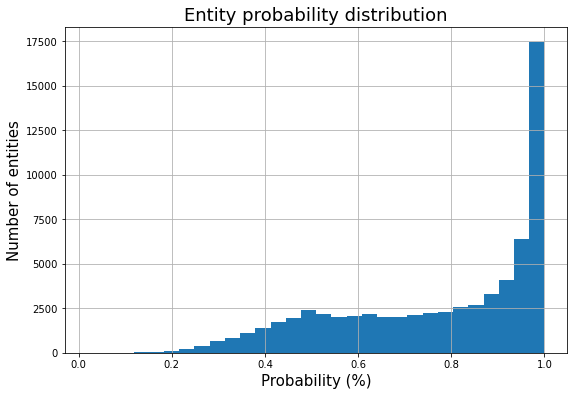

In [102]:
ax = all_probabilities.hist(bins=30, figsize=(9,6))
ax.set_title('Entity probability distribution', fontdict={'fontsize':18})
ax.set_xlabel('Probability (%)', fontdict={'fontsize':15})
ax.set_ylabel('Number of entities', fontdict={'fontsize':15})

Text(0, 0.5, 'Entities rate (%)')

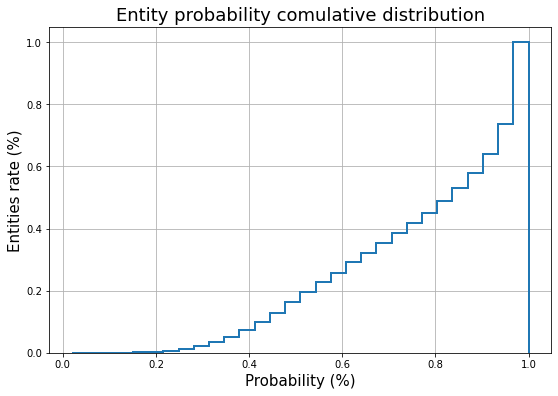

In [101]:
ax = all_probabilities.hist(bins=30, density=True, cumulative=True, histtype='step', linewidth=2, figsize=(9,6))
ax.set_title('Entity probability comulative distribution', fontdict={'fontsize':18})
ax.set_xlabel('Probability (%)', fontdict={'fontsize':15})
ax.set_ylabel('Entities rate (%)', fontdict={'fontsize':15})